In [1]:
## TMDB stuffs
from tmdbv3api import TMDb, Movie, Discover, TV, Person, Season
from tmdbv3api import Account
from tmdbv3api import Authentication

## Import the rest of required libraries
import time, random
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set(palette='icefire') # set the default Seaborn style for graphics

## Own functions
import functions_1115 as func

##TMDB details
##Account details for getting movie reccomendations
##Run this block only once during a session
tmdb = TMDb()
tmdb.api_key = '0921b0cce35c0b2ec8b874614d1d0b47' ##insert apikey
tmdb.language = 'en'

USERNAME = "cybercat94"
PASSWORD = "Wave1994@"
auth = Authentication(username=USERNAME, password=PASSWORD)
account = Account()
details = account.details()
movie = Movie()

In [2]:
## Create a function that exports to a csv file:
## Takes the input params:
## - dictionary containing search parameters
## - Output CSV file name
## Continuously go through each search page (max 100, total 2000 movies) until no result is returned (search complete)
## Move these movies into a DataFrame using the dict_2_dataframe function

search_params = {
    ## Comment out params that are not required for search
    'sort_by':'',
    ## 'popularity.asc/desc','release_date.asc/desc','revenue.asc/desc','original_tite.asc/desc'
    
    'page':'1', ## 1-500, default 1. Do not modify this parameter.
    'primary_release_year':'', ## YYYY
    'primary_release_date.gte':'', ## 'YYYY-MM-DD'
    'primary_release_date.lte':'', ## 'YYYY-MM-DD'
    'release_date.gte':'', ## 'YYYY-MM-DD'
    'release_date.lte':'', ## 'YYYY-MM-DD'
    'year':'', ## YYYY
    
    ## Comma-separated list of person IDs
    'with_cast':'',
    'with_crew':'',
    'with_people':'',
    ## Comma-separated list of company IDs
    'with_companies':'',
    ## Comma-separated list of genre IDs
    'with_genres':'',
    'without_genres':'',
    ## Comma-separated list of keyword IDs
    'with_keywords':'',
    
    ## Integer minutes
    'with_runtime.gte':'',
    'with_runtime.lte':''  
}

def discover_2_csv(dict_param, output):
    df_out = None
    call_fail = 0
    
    ## Input validation
    if type(dict_param)!=dict or type(output)!=str:
        print('Error, inputs must be a dictionary and a string')
        return
    
    ## up to 500 pages available to extract, depending on how broad search is. So up to 20*500=10000 movies possible
    for page_no in range(1,501): ## for debugging purposes, change to max=10
        
        ## Set the current page
        dict_param['page']=page_no
        
        ## Get the list
        movie_list = discover.discover_movies(dict_param)
        
        ## Terminate search if most recent page has nothing
        if len(movie_list) == 0:
            break
            
        ## Make the large dataframe
        try:
            if df_out is None:
                df_out = func.consec_dict_2_df(movie_list)
            else:
                df_out = pd.concat([df_out,func.consec_dict_2_df(movie_list)],sort=True)
        except:
            call_fail += 1
        
        ## Output statements to keep track of things
        print('Page number: '+str(page_no)+'/500', end='\r')
    
    ## Resetting the index to count normally
    df_out.reset_index(drop=True, inplace=True)
    print('\nSearch complete\n'+str(page_no*20)+' movies found')
    print(str(len(df_out))+' movies returned')
    print(str(call_fail)+' calls did not get through')
    df_out.to_csv(output)
    print("Exported to local folder:",output)
    return df_out

In [3]:
## Discover movies
## Takes a massive number of search parameters
## Returns a list of 20 movies (dictionaries)
## Faster than manually querying one id at a time
discover = Discover()
movies = discover.discover_movies({
    'year': '2021',
    'page':500
})
#print('Number of movies in search result:',len(movies))
#for movie in movies:
#    print(movie['original_title'])

In [4]:
test_output = func.discover_2_csv({'year':2022}, '2022_movies.csv')

Page number: 8/500
Search complete
180 movies found
156 movies returned
0 calls did not get through
Exported to local folder: 2022_movies.csv


In [5]:
for item in movie.details(10000):
    print(item)

adult
backdrop_path
belongs_to_collection
budget
genres
homepage
id
imdb_id
original_language
original_title
overview
popularity
poster_path
production_companies
production_countries
release_date
revenue
runtime
spoken_languages
status
tagline
title
video
vote_average
vote_count
videos
trailers
images
casts
translations
keywords
release_dates


<AxesSubplot:xlabel='release_date', ylabel='Count'>

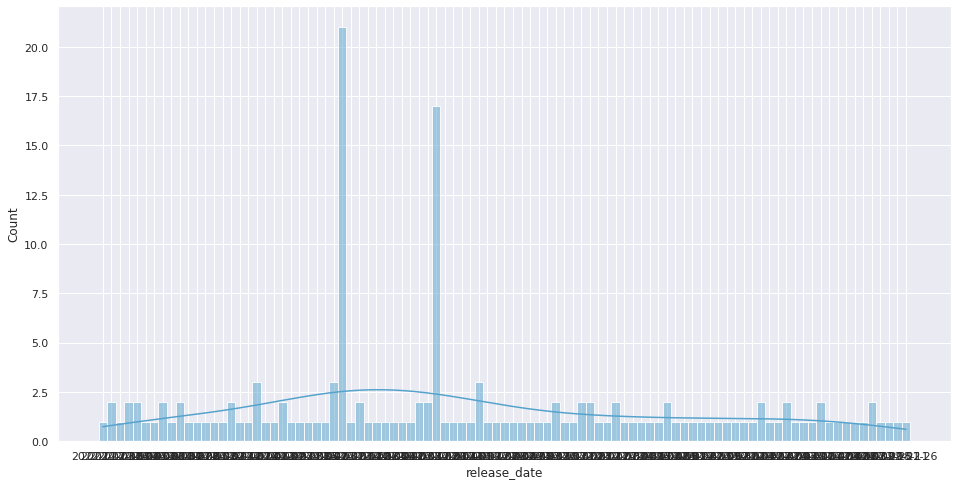

In [8]:
#test_output.drop(test_output['popularity']==1, inplace=True)
plt.figure(figsize=(16,8))
sb.histplot(x=test_output['release_date'], kde=True)